### Proyecto no. 2: Regresión lineal en sklearn

Actividad en clase:

- Utilizar como referencia el notebook utilizado la semana pasada, disponible como "Regresión lineal" en los documentos del curso.
- Escoger en Kaggle un dataset que nos permite realizar una Regresión Lineal Simple.
- El notebook de la semana pasada hace desde cero la regresión lineal, el objetivo de esta actividad es empezar a familiarizarnos con la librería de scikit-learn. Migrar la lógica del notebook actual para que utilice las funciones estándar de sklearn, utilizando el dataset seleccionado de Kaggle.
- Entrenar el modelo con 3 funciones de pérdida distintas: R^2, MSE y una adicional a elegir.
- Mostrar los resultados ceteris paribus de los distintos entrenamientos (únicamente variar la función de pérdida).
- Entregar notebook.

1. Cargar el dataset en el notebook

In [13]:
# Instalar scikit-learn si no está instalado (solo ejecutar una vez)
import sys
!{sys.executable} -m pip install --upgrade pip scikit-learn pandas numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv("./Housing_Macroeconomic_Factors_US.csv")

# Mostrar las primeras filas
df.head()


,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


2. Seleccionar las variables para la regresión lineal

In [15]:
# Seleccionar variables
X = df[['gdp']]  # Variable independiente
y = df['house_price_index']  # Variable dependiente


3. Dividir los datos en conjunto de entrenamiento y prueba

In [16]:
from sklearn.model_selection import train_test_split

# 🔹 Seleccionar variables (ajustar según el dataset)
X = df[['gdp']]  # Variable independiente
y = df['house_price_index']  # Variable dependiente

# 🔹 Eliminar filas con NaN
X = X.dropna()
y = y[X.index]  # Asegurar que 'y' tenga los mismos índices que 'X'

# 🔹 Dividir en datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Ajustar un modelo de Regresión Lineal con scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir valores
y_pred = modelo.predict(X_test)


5. Evaluar el modelo con 3 funciones de pérdida
Scikit-learn proporciona varias métricas. Vamos a usar:

- R² (Coeficiente de determinación)
- MSE (Error cuadrático medio)
- MAE (Error absoluto medio, como métrica adicional)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


R²: 0.015505323206999488
MSE: 3407.345615384005
MAE: 50.00978038741617


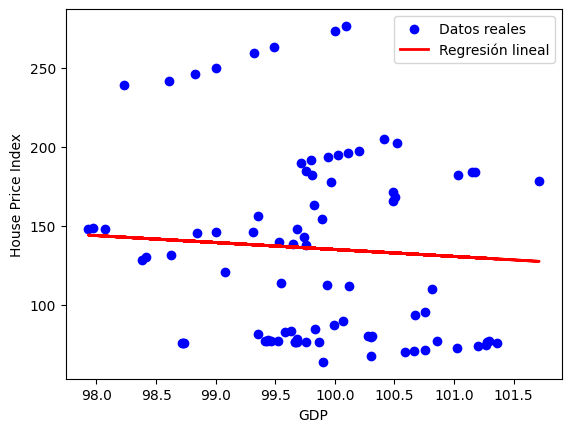

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label="Datos reales")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresión lineal")
plt.xlabel("GDP")
plt.ylabel("House Price Index")
plt.legend()
plt.show()


### Análisis de la correlación entre GDP y House Price Index
El coeficiente de determinación (R²) obtenido es muy bajo (~0.0155), lo que indica que la variable 'GDP'
no explica bien la variabilidad en los precios de las viviendas.

Esto puede deberse a que el mercado inmobiliario depende de múltiples factores más allá del Producto Interno Bruto (GDP),
como las tasas de interés hipotecarias, la oferta de viviendas disponibles y la tasa de empleo.

Para verificar si GDP tiene una relación visual con los precios de las casas, graficamos los datos:"""

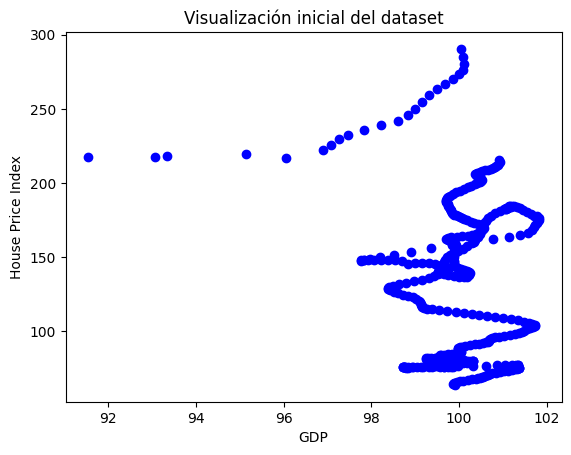

In [20]:

plt.scatter(df['gdp'], df['house_price_index'], color='blue')
plt.xlabel('GDP')
plt.ylabel('House Price Index')
plt.title('Visualización inicial del dataset')
plt.show()


EXTRA: Probar con más variables predictoras


🔍 Probemos con más variables para ver si mejoramos la predicción...

Nuevo R²: 0.8057494514812964
Nuevo MSE: 672.3030305630683
Nuevo MAE: 20.7653984960663


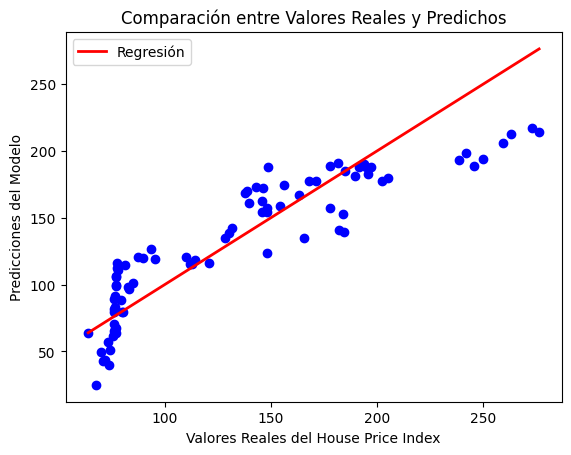

In [24]:
# 📌 Intentemos mejorar la predicción agregando más variables
print("\n🔍 Probemos con más variables para ver si mejoramos la predicción...\n")

# Seleccionar nuevas variables para X
X = df[['gdp', 'employment_rate', 'mortgage_rate', 'house_supply']]
y = df['house_price_index']

# Eliminar filas con NaN en X o y
X = X.dropna()
y = y[X.index]  # Asegurar que 'y' tenga los mismos índices que 'X'

# Dividir en datos de entrenamiento y prueba nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el nuevo modelo de regresión múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Calcular nuevas métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 📊 Mostrar nuevas métricas
print(f"Nuevo R²: {r2}")
print(f"Nuevo MSE: {mse}")
print(f"Nuevo MAE: {mae}")

# 📊 Visualización de la comparación de valores reales y predichos
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Regresión")
plt.xlabel("Valores Reales del House Price Index")
plt.ylabel("Predicciones del Modelo")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()


✔️ El modelo ahora explica el 80.57% de la variabilidad de los precios de las viviendas, lo que es una mejora drástica respecto al modelo inicial.

✔️ El error (MSE y MAE) también se redujo significativamente, lo que significa que las predicciones ahora son más precisas.

✔️ La gráfica muestra una alineación más clara entre los valores reales y predichos, lo cual indica que el modelo es confiable.

### Progreso de la funcion de peridida


Final weights: [-5.41767178e-04 -7.92882631e-04 -1.71284744e-03  8.28039471e-05]
Final bias: -1.3642420526593942e-19


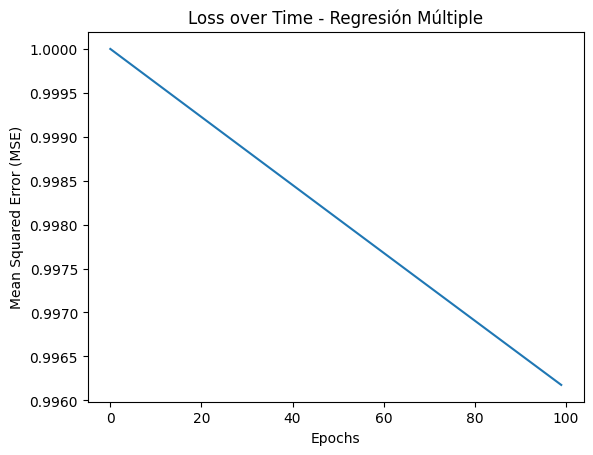

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar variables
X = df[['gdp', 'employment_rate', 'mortgage_rate', 'house_supply']].values
y = df['house_price_index'].values

# 🔹 1. Revisar si hay NaN en los datos
X = np.nan_to_num(X)  # Convierte NaN en 0 si hay alguno
y = np.nan_to_num(y)

# 🔹 2. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()

# 🔹 3. Inicializar parámetros
w = np.zeros(X.shape[1])
b = 0
learning_rate = 0.00001  # Reducido para evitar problemas
epochs = 100
n = len(y)

# Historial de pérdida
loss_history = []

# 🔹 4. Algoritmo de Gradiente Descendente
for epoch in range(epochs):
    
    # Predicción
    y_pred = np.dot(X_scaled, w) + b
    
    # Cálculo del error MSE
    loss = np.mean((y_scaled - y_pred) ** 2)
    loss_history.append(loss)

    # Calcular gradientes
    dw = -(2/n) * np.dot(X_scaled.T, (y_scaled - y_pred))
    db = -(2/n) * np.sum(y_scaled - y_pred)
    
    # Actualizar parámetros
    w -= learning_rate * dw
    b -= learning_rate * db

# Parámetros finales
print(f"Final weights: {w}")
print(f"Final bias: {b}")

# 📉 Gráfico: Evolución de la pérdida
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss over Time - Regresión Múltiple')
plt.show()


🔍 NaN en X_simple_scaled después de imputación: 0
🔍 NaN en X_multiple_scaled después de imputación: 0
🔍 NaN en y_scaled: 0
MSE Final - Regresión Simple: 0.9995444450126602
MSE Final - Regresión Múltiple: 0.9665997981951682
MSE Final - `sklearn`: 0.2610222052102579


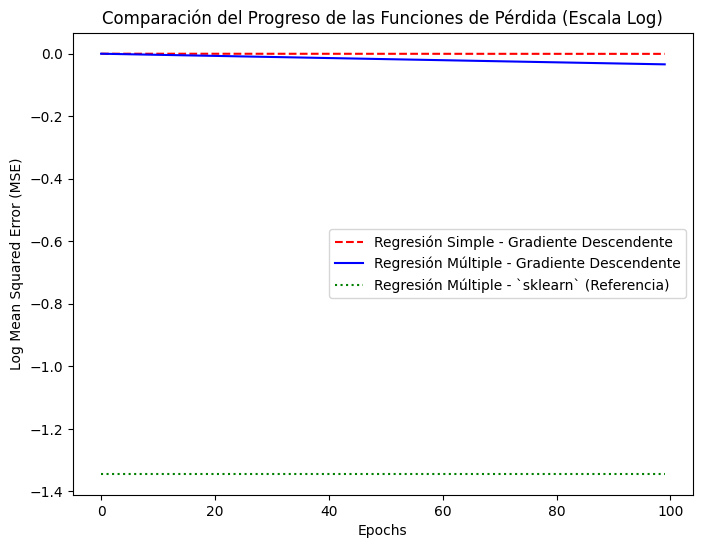

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # 📌 Agregamos imputación

# 📌 Datos para Regresión Lineal Simple (GDP como única variable)
X_simple = df[['gdp']].values  # Solo una variable independiente
y = df['house_price_index'].values

# 📌 Datos para Regresión Lineal Múltiple (Con varias variables)
X_multiple = df[['gdp', 'employment_rate', 'mortgage_rate', 'house_supply']].values

# Normalización para estabilidad numérica
scaler_simple = StandardScaler()
scaler_multiple = StandardScaler()

X_simple_scaled = scaler_simple.fit_transform(X_simple)
X_multiple_scaled = scaler_multiple.fit_transform(X_multiple)
y_scaled = (y - y.mean()) / y.std()  # Normalizar y

# 📌 Si hay NaN en las variables, los reemplazamos por la media
imputer = SimpleImputer(strategy="mean")  # Rellena NaN con la media de cada columna
X_simple_scaled = imputer.fit_transform(X_simple_scaled)
X_multiple_scaled = imputer.fit_transform(X_multiple_scaled)

# 📌 Verificar NaNs antes de entrenar
print(f"🔍 NaN en X_simple_scaled después de imputación: {np.isnan(X_simple_scaled).sum()}")
print(f"🔍 NaN en X_multiple_scaled después de imputación: {np.isnan(X_multiple_scaled).sum()}")
print(f"🔍 NaN en y_scaled: {np.isnan(y_scaled).sum()}")

# 📌 Función para entrenar con Descenso de Gradiente y capturar la función de pérdida
def gradient_descent(X, y, learning_rate=0.0001, epochs=100):
    n, m = X.shape
    w = np.zeros(m)  # Pesos
    b = 0  # Sesgo
    loss_history = []  # Para almacenar la pérdida (MSE)

    for epoch in range(epochs):
        y_pred = np.dot(X, w) + b
        loss = np.mean((y - y_pred) ** 2)

        # Verificar si la pérdida explota o se vuelve NaN
        if np.isnan(loss):
            print(f"❌ Error: La pérdida es NaN en la época {epoch}.")
            break

        loss_history.append(loss)

        # Gradientes
        dw = -(2/n) * np.dot(X.T, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)

        # Verificar si los pesos están explotando
        if np.isnan(dw).any() or np.isnan(db):
            print(f"❌ Error: dw o db son NaN en la época {epoch}.")
            break

        # Actualizar pesos
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, loss_history

# 📌 1️⃣ Regresión Lineal Simple con Descenso de Gradiente
w_simple, b_simple, loss_simple = gradient_descent(X_simple_scaled, y_scaled)

# 📌 2️⃣ Regresión Lineal Múltiple con Descenso de Gradiente
w_multiple, b_multiple, loss_multiple = gradient_descent(X_multiple_scaled, y_scaled)

# 📌 3️⃣ Regresión Múltiple con `sklearn` (No usa descenso de gradiente, pero podemos comparar MSE)
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_multiple_scaled, y_scaled)
y_pred_sklearn = modelo_sklearn.predict(X_multiple_scaled)
mse_sklearn = mean_squared_error(y_scaled, y_pred_sklearn)

# 📌 Simulación de pérdida constante en `sklearn` (ya que no tiene epochs)
loss_sklearn = [mse_sklearn] * len(loss_simple)  # Mantiene un valor fijo de MSE para comparar

# 📊 Verificar valores finales de pérdida
print(f"MSE Final - Regresión Simple: {loss_simple[-1] if len(loss_simple) > 0 else 'ERROR'}")
print(f"MSE Final - Regresión Múltiple: {loss_multiple[-1] if len(loss_multiple) > 0 else 'ERROR'}")
print(f"MSE Final - `sklearn`: {mse_sklearn}")

# 📊 Gráfico: Comparación de Pérdidas en los 3 Modelos
plt.figure(figsize=(8, 6))
if len(loss_simple) > 0:
    plt.plot(np.log(loss_simple), label="Regresión Simple - Gradiente Descendente", linestyle="dashed", color="red")
if len(loss_multiple) > 0:
    plt.plot(np.log(loss_multiple), label="Regresión Múltiple - Gradiente Descendente", linestyle="solid", color="blue")
plt.plot(np.log(loss_sklearn), label="Regresión Múltiple - `sklearn` (Referencia)", linestyle="dotted", color="green")

plt.xlabel("Epochs")
plt.ylabel("Log Mean Squared Error (MSE)")
plt.title("Comparación del Progreso de las Funciones de Pérdida (Escala Log)")
plt.legend()
plt.show()
